In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import font_manager,rc

In [2]:
#font path setting
font_path = "C:/Windows/Fonts/HMFMMUEX.ttc"
#font import
font_name = font_manager.FontProperties(fname=font_path).get_name()
#font setting
matplotlib.rc('font',family=font_name)

In [3]:
# ODE
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta*S*I
    dI_dt = beta*S*I - gamma*I
    dR_dt = gamma*I
    return([dS_dt, dI_dt, dR_dt])

In [4]:
#initial conditions
S0 = 1
I0 = 3/10000
R0 = 2/10000
beta = 0.2934
gamma = 1/14

t = np.linspace(0, 150, 150)

In [5]:
# solve
sol = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
sol = np.array(sol)

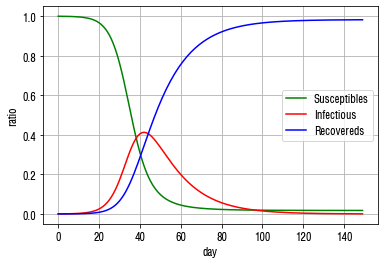

In [6]:
plt.figure()
plt.plot(sol[:, 0], 'g-', label='Susceptibles')
plt.plot(sol[:, 1], 'r-', label='Infectious')
plt.plot(sol[:, 2], 'b-', label='Recovereds')
plt.grid()
plt.legend()
plt.xlabel('day')
plt.ylabel('ratio')
plt.show()

## 파라미터 변화에 따른 예측 모델
### 초기조건 S0, I0, R0은 동일

In [7]:
S0 = 1
I0 = 1/10000
R0 = 0/10000
gamma = 1/10

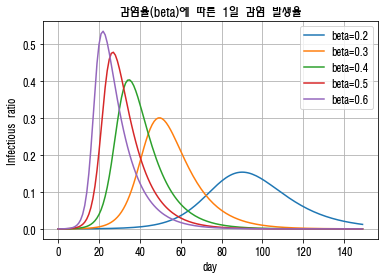

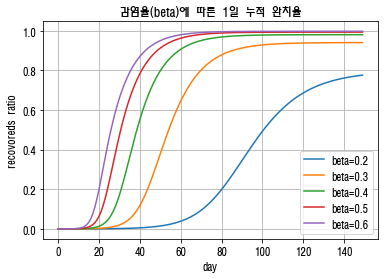

In [8]:
t = np.linspace(0, 150, 150)
for beta in np.linspace(0.2, 0.6, 5):
    sol = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
    sol = np.array(sol)
    plt.plot(sol[:, 1], label='beta={:.1f}'.format(beta))
    plt.grid()
plt.title('감염율(beta)에 따른 1일 감염 발생율')
plt.legend()
plt.xlabel('day')
plt.ylabel('Infectious ratio')
plt.show()
for beta in np.linspace(0.2, 0.6, 5):
    sol = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
    sol = np.array(sol)
    plt.plot(sol[:, 2], label='beta={:.1f}'.format(beta))

plt.title('감염율(beta)에 따른 1일 누적 완치율')
plt.grid()
plt.legend()
plt.xlabel('day')
plt.ylabel('recovoreds ratio')
plt.show()

In [9]:
S0 = 1
I0 = 1/10000
R0 = 0/10000
beta = 0.2

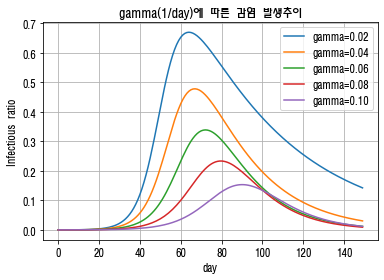

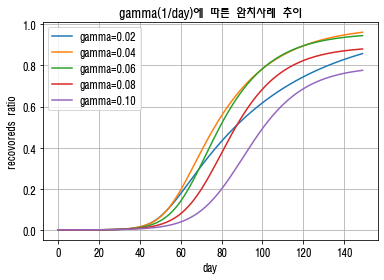

In [10]:
t = np.linspace(0, 150, 150)
for gamma in np.linspace(1/50, 1/10, 5):
    sol = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
    sol = np.array(sol)
    plt.plot(sol[:, 1], label='gamma={:.2f}'.format(gamma))
plt.title('gamma(1/day)에 따른 감염 발생추이')
plt.grid()
plt.legend()
plt.xlabel('day')
plt.ylabel('Infectious ratio')
plt.show()
for gamma in np.linspace(1/50, 1/10, 5):
    sol = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
    sol = np.array(sol)
    plt.plot(sol[:, 2], label='gamma={:.2f}'.format(gamma))
plt.title('gamma(1/day)에 따른 완치사례 추이')
plt.grid()
plt.legend()
plt.xlabel('day')
plt.ylabel('recovoreds ratio')
plt.show()